In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Processed Data Frame [ Do Not Use this, Use the Training, Tesing and Validation Data Sets Instead]
data_path = "./Pickles/all_articles_processed.pickle"
with open(data_path, 'rb') as data:
    all_articles = pickle.load(data)
    
    
#TD-IDF Features    
#Training Features
training_features_path = "./Pickles/tdidf_training_features.pickle"
with open(training_features_path, 'rb') as data:
    tdidf_training_features = pickle.load(data)
    
#Training Labels
training_labels_path = "./Pickles/tdidf_training_labels.pickle"
with open(training_labels_path, 'rb') as data:
    tdidf_training_labels = pickle.load(data)
    
#Test Features
test_features_path = "./Pickles/tdidf_test_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_test_features = pickle.load(data)
    
#Test Labels
test_labels_path = "./Pickles/tdidf_test_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_test_labels = pickle.load(data)
    
#Validation Features
test_features_path = "./Pickles/tdidf_validation_features.pickle"
with open(test_features_path, 'rb') as data:
    tdidf_validation_features = pickle.load(data)
    
#Validation Labels
test_labels_path = "./Pickles/tdidf_validation_labels.pickle"
with open(test_labels_path, 'rb') as data:
    tdidf_validation_labels = pickle.load(data)

In [11]:
category_mapping = {
    'Singapore': 1,
    'Sports': 2,
    'Lifestyle': 3,
    'World': 4,
    'Business': 5,
    'Technology': 6
}

In [12]:
%%time
logreg_base_model = LogisticRegression(random_state = 8)
logreg_base_model.fit(tdidf_training_features, tdidf_training_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 3.03 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=8, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
logreg_base_model_pred=logreg_base_model.predict(tdidf_test_features)

In [14]:
logreg_base_model_score = accuracy_score(tdidf_test_labels, logreg_base_model.predict(tdidf_test_features))
print("Multinomial Logistic Regression Baseline Accuracy:", logreg_base_model_score)

Multinomial Logistic Regression Baseline Accuracy: 0.8333333333333334


In [15]:
# Classification report
print("Classification report")
print(classification_report(tdidf_test_labels,logreg_base_model_pred,target_names=category_mapping))

Classification report
              precision    recall  f1-score   support

   Singapore       0.85      0.82      0.83       130
      Sports       0.95      0.96      0.96       130
   Lifestyle       0.82      0.95      0.88       113
       World       0.85      0.75      0.80       113
    Business       0.71      0.74      0.72       110
  Technology       0.79      0.77      0.78       124

    accuracy                           0.83       720
   macro avg       0.83      0.83      0.83       720
weighted avg       0.83      0.83      0.83       720



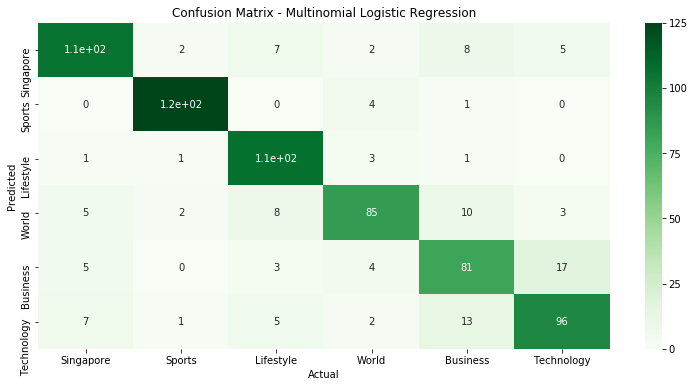

In [16]:
logreg_base_model_confu_matrix = confusion_matrix(tdidf_test_labels, logreg_base_model_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(logreg_base_model_confu_matrix, 
            annot=True,
            xticklabels=category_mapping, 
            yticklabels=category_mapping,
            cmap="Greens")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix - Multinomial Logistic Regression')
plt.show()